In [116]:
import ast, glob, json
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from rich import print
from typing import Dict

### General notes
* The log files generated by the intercode environment are named as `log_<date>.json`
    * Date is YYYYMMDDhhmmss
* The log files generally follow the same structure:

```
{
    'environment': <'ic_bash' or 'ic_sql'>,
    'query': <str>,
    'gold': <str>,
    'trajectory': <List<Dict<[action: str, observation: str]>>,
    'info': Info relevant to reward calculation. Varies by environment
}
```

In [117]:
data_path = "../data/results"

## Analysis Functions

In [118]:
def single_turn_analysis(data, hardness=["all"]):
    reward, err_percent, total = 0, 0, 0
    for key, value in data.items():
        if hardness != ["all"] and "hardness" in value and value["hardness"] not in hardness:
            continue
#         reward += value["turn_history"]["rewards"][0]
        reward += 1 if value["turn_history"]["rewards"][0] == 1 else 0
        err_percent += 1 if not value["turn_history"]["valid_action"][0] else 0
        total += 1
    print(f'Reward: {reward * 1. / total}')
    print(f'Error Rate: {err_percent * 1. / total}')

In [119]:
def multi_turn_analysis(data, hardness=["all"]):
    reward, turns_taken, err_percent, total = 0, 0, 0, 0
    for key, value in data.items():
        if hardness != ["all"] and "hardness" in value and value["hardness"] not in hardness:
            continue
#         reward += value['summary']['max_reward']
        reward += 1 if value["summary"]['max_reward'] == 1 else 0
        turns_taken += value['summary']['turns_taken']
        err_percent += value["turn_history"]["valid_action"].count(False)*1./len(value["turn_history"]["valid_action"])
        total += 1
    print(f'Reward: {reward * 1. / total}')
    print(f'Turns Taken: {turns_taken * 1. / total}')
    print(f'Error Rate: {err_percent * 1. / total}')

In [120]:
def react_analysis(data, hardness=["all"]):
    reward, turns_taken, err_percent, total = 0, 0, 0, 0
    for key, value in data.items():
        if hardness != ["all"] and "hardness" in value and value["hardness"] not in hardness:
            continue
#         reward += value['summary']['max_reward']
        reward += 1 if value["summary"]['max_reward'] == 1 else 0
        turns_taken += value['summary']['turns_taken']
        err_percent += value["turn_history"]["valid_action"].count(False)*1./len(value["turn_history"]["valid_action"])
        total += 1
    print(f'Reward: {reward * 1. / total}')
    print(f'Turns Taken: {turns_taken * 1. / total}')
    print(f'Error Rate: {err_percent * 1. / total}')

In [121]:
def pands_analysis(data, hardness=["all"]):
    reward, plan_len, err_percent, total = 0, 0, 0, 0
    for key, value in data.items():
        if hardness != ["all"] and "hardness" in value and value["hardness"] not in hardness:
            continue
#         reward += value['summary']['max_reward']
        reward += 1 if value["summary"]['max_reward'] == 1 else 0
        plan_len += len(value['turn_history']['actions'])
        err_percent += value["turn_history"]["valid_action"].count(False)*1./len(value["turn_history"]["valid_action"])
        total += 1
    print(f'Reward: {reward * 1. / total}')
    print(f'Plan Length: {plan_len * 1. / total}')
    print(f'Error Rate: {err_percent * 1. / total}')

In [122]:
def errant_code_rate(data, hardness=["all"], plot=False):
    error_rate = {}
    for key, value in data.items():
        if hardness != ["all"] and "hardness" in value and value["hardness"] not in hardness:
            continue
        for idx, is_valid in enumerate(value['turn_history']['valid_action']):
            if idx not in error_rate:
                error_rate[idx] = []
            error_rate[idx].append(is_valid)
            
    error_rate_ = {}
    error_counts = []
    for k, v in error_rate.items():
        v_percent = sum(v)*1.0/len(v)
        error_rate_[k] = v_percent
        error_counts.append(len(v))
    err_rate, err_cnt = error_rate_, error_counts
    
    if plot:
        plt.bar(list(err_rate.keys()), list([v for _, v in err_rate.items()]), )

        # 
        # Add count to the center of each bar
        for i in range(len(err_cnt)):
            plt.text(i, err_rate[i] / 2, str(err_cnt[i]), ha='center', va='center', color='white')
            plt.text(i, err_rate[i], str(round(err_rate[i]*100, 1)), ha='center', va='bottom')

        plt.title("")
        plt.ylabel("Error Rate")
        plt.ylim([0, 1])
        plt.xlabel("Turn")
        plt.xticks(list(err_rate.keys()));
    
    return err_rate, err_cnt

<hr/>

# SQL

## Single Turn Analysis

In [123]:
file_sql   = f"{data_path}/sql/gpt-3.5/ic_sql_multiturn_gpt-3.5-1_turns.json"
file_sql_h = f"{data_path}/sql/gpt-3.5/ic_sql_multiturn_gpt-3.5-1_turns_handicap.json"
data_sql   = json.load(open(file_sql, "r"))
data_sql_h = json.load(open(file_sql_h, "r"))

**SQL, Single Turn (No Handicap)**

In [124]:
single_turn_analysis(data_sql)

Reward: 0.10541586073500966

Error Rate: 0.8781431334622823

**SQL, Single Turn (Handicap)**

In [125]:
single_turn_analysis(data_sql_h)

Reward: 0.7156673114119922

Error Rate: 0.03481624758220503

### Multi Turn Analysis

In [126]:
file_sql_10 = f"{data_path}/sql/gpt-3.5/ic_sql_multiturn_gpt-3.5_10_turns.json"
file_sql_h_10 = f"{data_path}/sql/gpt-3.5/ic_sql_multiturn_gpt-3.5_10_turns_handicap.json"
data_sql_10 = json.load(open(file_sql_10, "r"))
data_sql_h_10 = json.load(open(file_sql_h_10, "r"))

In [127]:
multi_turn_analysis(data_sql_10)

Reward: 0.47292069632495165

Turns Taken: 7.252417794970986

Error Rate: 0.4640899880261581

In [128]:
multi_turn_analysis(data_sql_h_10)

Reward: 0.7282398452611218

Turns Taken: 3.5241779497098644

Error Rate: 0.02365294280187898

### ReAct Analysis

In [129]:
file_sql_react = f"{data_path}/sql/gpt-3.5/ic_sql_react_10_turns.json"
data_sql_react = json.load(open(file_sql_react, "r"))
len(data_sql_react)

1034

In [130]:
react_analysis(data_sql_react)

Reward: 0.5870406189555126

Turns Taken: 5.300773694390716

Error Rate: 0.0693697474887031

### Plan & Solve Analysis

In [131]:
file_sql_pands = f"{data_path}/sql/gpt-3.5/ic_sql_plan_solve.json"
data_sql_pands = json.load(open(file_sql_pands, "r"))
len(data_sql_pands['logs'])

1034

In [132]:
pands_analysis(data_sql_pands['logs'])

Reward: 0.4912959381044487

Plan Length: 4.2891682785299805

Error Rate: 0.16235430430304684

In [133]:
file_sql_pands_refine = f"{data_path}/sql/gpt-3.5/ic_sql_plan_solve_refine_3_turns.json"
data_sql_pands_refine = json.load(open(file_sql_pands_refine, "r"))

In [134]:
pands_analysis(data_sql_pands_refine['logs'])

Reward: 0.45454545454545453

Plan Length: 6.340909090909091

Error Rate: 0.2242784992784993

In [135]:
len(data_sql_pands_refine['logs'])

44

### SQL Tasks solved by both ReAct and Plan \& Solve

In [136]:
sql_pands_completed = [k for k, v in data_sql_pands['logs'].items() if v['summary']['max_reward'] == 1]
sql_react_completed = [k for k, v in data_sql_react.items() if v['summary']['max_reward'] == 1]
solved_across_both = list(set(sql_react_completed + sql_pands_completed))
solved_by_both = list(set(sql_react_completed) & set(sql_pands_completed))
print(f"Solved by both: {len(solved_by_both)}")
print(f"Solved across both: {len(solved_across_both)}")
len(solved_by_both) * 1. / len(solved_across_both)

Solved by both: 407

Solved across both: 708

0.5748587570621468

<hr/>

# Bash

In [137]:
file_bash_1 = f"{data_path}/bash/gpt-3.5/ic_bash_multiturn_gpt-3.5_10_turns_fs_1.json"
file_bash_2 = f"{data_path}/bash/gpt-3.5/ic_bash_multiturn_gpt-3.5_10_turns_fs_2.json"
file_bash_3 = f"{data_path}/bash/gpt-3.5/ic_bash_multiturn_gpt-3.5_10_turns_fs_3.json"
file_bash_4 = f"{data_path}/bash/gpt-3.5/ic_bash_multiturn_gpt-3.5_10_turns_fs_4.json"
data_bash_1 = {f"fs_1_{k}": v for k, v in json.load(open(file_bash_1, 'r')).items()}
data_bash_2 = {f"fs_2_{k}": v for k, v in json.load(open(file_bash_2, 'r')).items()}
data_bash_3 = {f"fs_3_{k}": v for k, v in json.load(open(file_bash_3, 'r')).items()}
data_bash_4 = {f"fs_4_{k}": v for k, v in json.load(open(file_bash_4, 'r')).items()}
data_bash = {**data_bash_1, **data_bash_2, **data_bash_3, **data_bash_4}
len(data_bash)

200

### Single Turn Analysis

In [138]:
single_turn_analysis(data_bash_1)

Reward: 0.3

Error Rate: 0.25

In [139]:
single_turn_analysis(data_bash_2)

Reward: 0.39622641509433965

Error Rate: 0.18867924528301888

In [140]:
single_turn_analysis(data_bash_3)

Reward: 0.3333333333333333

Error Rate: 0.26666666666666666

In [141]:
single_turn_analysis(data_bash)

Reward: 0.345

Error Rate: 0.23

### Multi Turn Analysis

In [142]:
multi_turn_analysis(data_bash)

Reward: 0.465

Turns Taken: 6.15

Error Rate: 0.24933333333333332

### ReAct Analysis

In [164]:
file_bash_react_1 = f"{data_path}/bash/gpt-3.5/ic_bash_react_10_turns_fs_1.json"
file_bash_react_2 = f"{data_path}/bash/gpt-3.5/ic_bash_react_10_turns_fs_2.json"
file_bash_react_3 = f"{data_path}/bash/gpt-3.5/ic_bash_react_10_turns_fs_3.json"
file_bash_react_4 = f"{data_path}/bash/gpt-3.5/ic_bash_react_10_turns_fs_4.json"
data_bash_react_1 = {f"fs_1_{k}": v for k, v in json.load(open(file_bash_react_1, 'r')).items()}
data_bash_react_2 = {f"fs_2_{k}": v for k, v in json.load(open(file_bash_react_2, 'r')).items()}
data_bash_react_3 = {f"fs_3_{k}": v for k, v in json.load(open(file_bash_react_3, 'r')).items()}
data_bash_react_4 = {f"fs_4_{k}": v for k, v in json.load(open(file_bash_react_4, 'r')).items()}
data_bash_react = {**data_bash_react_1, **data_bash_react_2, **data_bash_react_3, **data_bash_react_4}
len(data_bash_react)

200

In [165]:
react_analysis(data_bash_react)

Reward: 0.205

Turns Taken: 4.4

Error Rate: 0.2038890692640692

### Plan & Solve Analysis

In [169]:
file_bash_pands_1 = f"{data_path}/bash/gpt-3.5/ic_bash_plan_solve_fs_1.json"
file_bash_pands_2 = f"{data_path}/bash/gpt-3.5/ic_bash_plan_solve_fs_2.json"
file_bash_pands_3 = f"{data_path}/bash/gpt-3.5/ic_bash_plan_solve_fs_3.json"
file_bash_pands_4 = f"{data_path}/bash/gpt-3.5/ic_bash_plan_solve_fs_4.json"
data_bash_pands_1 = {f"fs_1_{k}": v for k, v in json.load(open(file_bash_pands_1, 'r')).items()}
data_bash_pands_2 = {f"fs_2_{k}": v for k, v in json.load(open(file_bash_pands_2, 'r'))['logs'].items()}
data_bash_pands_3 = {f"fs_3_{k}": v for k, v in json.load(open(file_bash_pands_3, 'r'))['logs'].items()}
data_bash_pands_4 = {f"fs_4_{k}": v for k, v in json.load(open(file_bash_pands_4, 'r'))['logs'].items()}
data_bash_pands = {**data_bash_pands_1, **data_bash_pands_2, **data_bash_pands_3, **data_bash_pands_4}
len(data_bash_pands)

200

In [170]:
pands_analysis(data_bash_pands)

Reward: 0.28

Plan Length: 6.65

Error Rate: 0.5325124320124323

In [171]:
file_bash_pands_refine = f"{data_path}/bash/gpt-3.5/ic_bash_plan_solve_refine_3_turns.json"
data_bash_pands_refine = json.load(open(file_bash_pands_refine, "r"))

In [172]:
pands_analysis(data_bash_pands_refine['logs'])

Reward: 0.0

Plan Length: 10.05

Error Rate: 0.8733297584768172

### Bash Tasks solved by both ReAct and Plan \& Solve

In [173]:
bash_pands_completed = [k for k, v in data_bash_pands.items() if v['summary']['max_reward'] == 1]
bash_react_completed = [k for k, v in data_bash_react.items() if v['summary']['max_reward'] == 1]
solved_across_both = list(set(bash_react_completed + bash_pands_completed))
solved_by_both = list(set(bash_react_completed) & set(bash_pands_completed))
print(f"Solved by both: {len(solved_by_both)}")
print(f"Solved across both: {len(solved_across_both)}")
len(solved_by_both) * 1. / len(solved_across_both)

Solved by both: 21

Solved across both: 76

0.27631578947368424

### Bash Error Rate

In [149]:
error_rate = {}
for key, value in data_bash.items():
    for idx, is_valid in enumerate(value['turn_history']['valid_action']):
        if idx not in error_rate:
            error_rate[idx] = []
        error_rate[idx].append(is_valid)

result = ""
for k, v in error_rate.items():
    v_percent = 1 - sum(v)*1.0/len(v)
#     print(v_percent, len(v))
    result += f"{round(v_percent*100, 1)} & "
print(result)

23.0 & 29.8 & 37.0 & 40.9 & 40.7 & 46.4 & 43.6 & 41.8 & 44.5 & 47.3 &

## Dataset Visualization

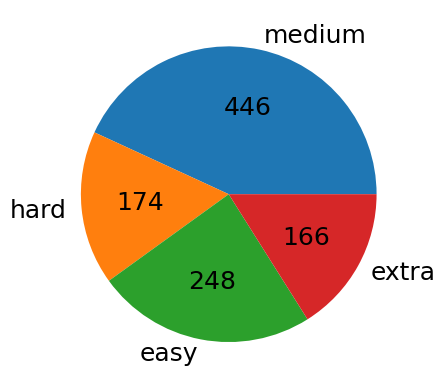

In [150]:
pi_data = Counter([v['hardness'] for _, v in data_sql_h_10.items()])
pi_sizes = np.array([v for _, v in pi_data.items()])
pi_labels = [k for k, _ in pi_data.items()]

def absolute_value(val):
    a  = np.round(val/100.*pi_sizes.sum(), 0)
    return int(a)

fig, ax = plt.subplots()
ax.pie(pi_sizes, labels=pi_labels, autopct=absolute_value, textprops={'fontsize': 18});
plt.savefig("sql_hardness.png",bbox_inches='tight')

## Trajectory Visualization

In [151]:
def traj_visual(traj):
    actions = traj["turn_history"]["actions"]
    observations = traj["turn_history"]["observations"]
    thoughts = traj["turn_history"]["thoughts"] \
        if "thoughts" in traj["turn_history"] else None
    traj_str = ""
    for idx in range(len(actions)):
        act = actions[idx].replace("_", "\_")
        if "execute" in act:
            act = act.replace("execute[", "")
            act = act.strip()[:len(act)-1]
        act = act.replace("{", "\{")
        act = act.replace("}", "\}")
        act = act.replace("$", "\$")
#         act = act.replace("|", "\text{\textbar}")
        
        obs = observations[idx]
        if "Error executing query" in obs:
            obs = obs.replace("Error executing query", "Error")
            if "Unknown column" in obs:
                obs = obs.split(" in ")[0].strip()
        if "[(" in obs:
            obs = ast.literal_eval(obs)
            if len(obs) > 3:
                obs = str(obs[:2]) + f" + {len(obs) - 2} more..."
            else:
                obs = str(obs)
        obs = obs.replace("_", "\_")
        obs = obs.replace("{", "\{")
        obs = obs.replace("}", "\}")
        obs = obs.replace("$", "\$")
#         obs = obs.replace("|", "\text{\textbar}")
        
        if thoughts is not None:
            thought = thoughts[idx].replace("_", "\_")
            traj_str += f"\\textbf{{Thought}}: {thought} \\\\\n"
        traj_str += f"\\textbf{{Act}}: \\texttt{{{act}}} \\\\\n"
        traj_str += f"\\textbf{{Obs}}: {obs} \\\\\n"
    return traj_str

In [160]:
traj_data_path = f"{data_path}/bash/gpt-3.5/ic_bash_multiturn_gpt-3.5_10_turns_fs_1.json"
traj_data_path = f"{data_path}/sql/gpt-3.5/ic_sql_multiturn_gpt-3.5_10_turns.json"
traj_data = json.load(open(traj_data_path, "r"))
_ = traj_visual(traj_data["810"])

In [161]:
print(traj_visual(traj_data["810"]))

\textbf{Act}: \texttt{SELECT continent.id, continent.name, COUNT(country.id) AS num\_countries FROM continent LEFT 
JOIN country ON continent.id = country.continent\_id GROUP BY continent.id, continent.name} \\
\textbf{Obs}: Error: Table 'car\_1.continent' doesn't exist \\
\textbf{Act}: \texttt{SHOW TABLES} \\
\textbf{Obs}: [('car\_makers',), ('car\_names',)] + 4 more... \\
\textbf{Act}: \texttt{DESC continents} \\
\textbf{Obs}: [('ContId', 'int', 'NO', 'PRI', None, 'auto\_increment'), ('Continent', 'text', 'YES', '', None, '')]
\\
\textbf{Act}: \texttt{SELECT ContId, Continent, COUNT(*) AS NumCountries FROM countries GROUP BY Continent} \\
\textbf{Obs}: Error: Unknown column 'ContId' \\
\textbf{Act}: \texttt{SELECT Id, Continent, COUNT(*) AS NumCountries FROM countries GROUP BY Continent} \\
\textbf{Obs}: Error: Unknown column 'Id' \\
\textbf{Act}: \texttt{SELECT ContinentId, Continent, COUNT(*) AS NumCountries FROM countries GROUP BY Continent} \\
\textbf{Obs}: Error: Unknown column 'ContinentId' \\
\textbf{Act}: \texttt{SELECT ContinentCode, ContinentName, COUNT(*) AS NumCountries FROM countries GROUP BY 
ContinentCode, ContinentName} \\
\textbf{Obs}: Error: Unknown column 'ContinentCode' \\
\textbf{Act}: \texttt{SELECT Continent, COUNT(*) AS NumCountries FROM countries GROUP BY Continent} \\
\textbf{Obs}: [(1, 3), (2, 6)] + 3 more... \\
\textbf{Act}: \texttt{SELECT ContinentId, COUNT(*) AS NumCountries FROM countries GROUP BY ContinentId} \\
\textbf{Obs}: Error: Unknown column 'ContinentId' \\
\textbf{Act}: \texttt{SELECT ContinentCode, COUNT(*) AS NumCountries FROM countries GROUP BY ContinentCode} \\
\textbf{Obs}: Error: Unknown column 'ContinentCode' \\

In [154]:
print(traj_visual(data_sql_react["841"]))

\textbf{Thought}: I should check what tables are available in this MySQL database that can help me answer this 
question \\
\textbf{Act}: \texttt{SHOW TABLES} \\
\textbf{Obs}: [('cartoon',), ('tv\_channel',), ('tv\_series',)] \\
\textbf{Thought}: I should check if the tv\_series table might have any information related to the episode name or 
the TV Channel \\
\textbf{Act}: \texttt{DESC tv\_series} \\
\textbf{Obs}: [('id', 'double', 'NO', 'PRI', None, ''), ('Episode', 'text', 'YES', '', None, '')] + 7 more... \\
\textbf{Thought}: The tv\_series table has a Channel column that might be helpful. I should check if there is a row
with the 
episode name "A Love of a Lifetime". \\
\textbf{Act}: \texttt{SELECT Channel FROM tv\_series WHERE Episode = 'A Love of a Lifetime'} \\
\textbf{Obs}: [('700',)] \\
\textbf{Thought}: I get a single value, 700, which is the TV Channel of the TV series with the episode "A Love of a
Lifetime".
I should check what series is on this channel. \\
\textbf{Act}: \texttt{SELECT series\_name FROM tv\_channel WHERE channel\_number = 700} \\
\textbf{Obs}: Error: Unknown column 'channel\_number' \\
\textbf{Thought}: I should check what columns are available in the tv\_channel table. \\
\textbf{Act}: \texttt{DESC tv\_channel} \\
\textbf{Obs}: [('id', 'varchar(255)', 'NO', 'PRI', None, ''), ('series\_name', 'text', 'YES', '', None, '')] + 7 
more... \\
\textbf{Thought}: The tv\_channel table does not have a channel\_number column. I should check if there is another 
way to get
the series name for the TV Channel 700. \\
\textbf{Act}: \texttt{SELECT series\_name FROM tv\_channel WHERE id = '700'} \\
\textbf{Obs}: [('Sky Radio',)] \\
\textbf{Thought}: I get a single value, Sky Radio, which is the series name for the TV Channel 700. This should be 
the answer. \\
\textbf{Act}: \texttt{submit} \\
\textbf{Obs}: [('Sky Radio',)] \\

## StarChat Stats

In [155]:
starchat_sql_path = f"{data_path}/sql/starchat/ic_sql_multiturn_starchat_10_turns.json"
data_starchat = json.load(open(starchat_sql_path, "r"))

In [156]:
single_turn_analysis(data_starchat)

Reward: 0.08897485493230174

Error Rate: 0.8646034816247582

In [157]:
multi_turn_analysis(data_starchat)

Reward: 0.09671179883945841

Turns Taken: 9.14119922630561

Error Rate: 0.8737588652482268

## Human Trajectories

In [158]:
human_data_path = f"{data_path}/sql/human/ic_sql_multiturn_human_10_turns.json"
human_data = json.load(open(human_data_path, 'r'))

In [159]:
print(f"Avg Reward: {round(np.mean([v['reward'] for k, v in human_data.items()]), 2)}")
print(f"Avg # of Turns: {round(np.mean([len(v['trajectory']) for k, v in human_data.items()]), 2)}")

Avg Reward: 0.87

Avg # of Turns: 7.47